<a href="https://colab.research.google.com/github/c-mmonteiro/t2-aprendizado/blob/main/Trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho 2 de Aprendizado de Máquina

Autor: Carlos A. M. Monteiro

## 1 Carregamento dos dados e EDA inicial

1. Baixe e carregue os dados a partir do Kaggle
link: https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset?datasetId=2066095&sortBy=voteCount

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/twitter-tweets-sentiment-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.23M/1.23M [00:00<00:00, 73.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/twitter-tweets-sentiment-dataset/versions/1


In [2]:
import pandas as pd
dados = pd.read_csv(path + "/Tweets.csv")
dados.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


2. Crie a variável alvo conforme a Tabela 1 e salve no dataset (por exemplo como target)

In [3]:
dados['target'] = dados['sentiment'].apply(lambda x: 1 if x == 'negative' else 0)
dados

,textID,text,selected_text,sentiment,target
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,1
2,088c60f138,my boss is bullying me...,bullying me,negative,1
3,9642c003ef,what interview! leave me alone,leave me alone,negative,1
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,1
...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,1
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,1
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,0
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,0


3. Observe se existem dados faltantes ou duplicados

In [4]:
print(f'Dados Faltantes:\n{dados.isnull().sum()}')
print(f'Linhas duplicadas:', dados.duplicated().sum())

Dados Faltantes:
textID           0
text             1
selected_text    1
sentiment        0
target           0
dtype: int64
Linhas duplicadas: 0


4. Plote um histograma do número dos caracteres dos reviews

Text(0, 0.5, 'Frequência')

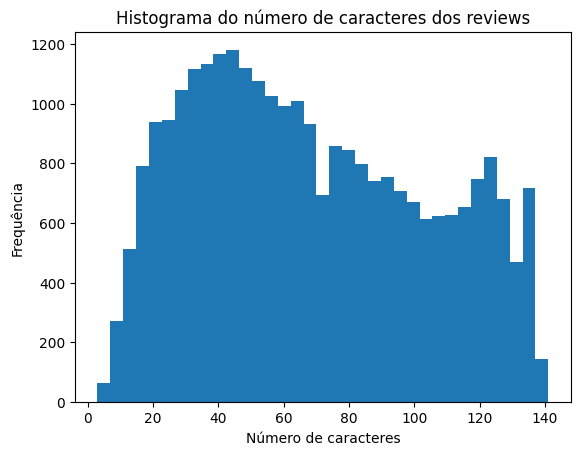

In [5]:
import matplotlib.pyplot as plt
import numpy as np

dados['text_str'] = dados['text'].astype(str)
dados['text_len'] = dados['text_str'].apply(len)

# Usando a regra de Freedman-Diaconis para determinar o número de bins
bins = int((np.max(dados['text_len']) - np.min(dados['text_len'])) / (2 * (np.percentile(dados['text_len'], 75) - np.percentile(dados['text_len'], 25)) * len(dados['text_len'])**(-1/3)))

plt.hist(dados['text_len'], bins=bins)
plt.title('Histograma do número de caracteres dos reviews')
plt.xlabel('Número de caracteres')
plt.ylabel('Frequência')

5. Plote um histograma do número de palavras dos reviews

Text(0, 0.5, 'Frequência')

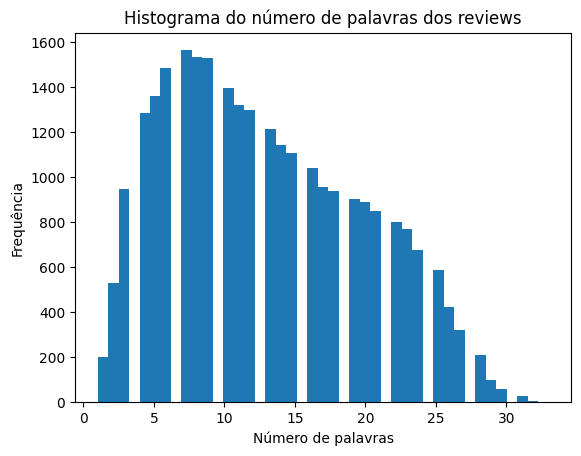

In [6]:
dados['word_count'] = dados['text_str'].apply(lambda x: len(x.split()))

bins = int((np.max(dados['word_count']) - np.min(dados['word_count'])) / (2 * (np.percentile(dados['word_count'], 75) - np.percentile(dados['word_count'], 25)) * len(dados['word_count'])**(-1/3)))

plt.hist(dados['word_count'], bins=bins)
plt.title('Histograma do número de palavras dos reviews')
plt.xlabel('Número de palavras')
plt.ylabel('Frequência')

6. Mostre os 5 maiores e menores comentários e o sentimento relacionado

In [7]:
comentarios_ordenados = dados[['text', 'text_len', 'sentiment']].sort_values('text_len', ascending=False)

print('5 maiores comentários:')
print(comentarios_ordenados.head(5))

print('\n5 menores comentários:')
print(comentarios_ordenados.tail(5))

5 maiores comentários:
                                                    text  text_len sentiment
3138   Is so freaking bored on the bus. Hate being po...       141  negative
27318  just saw an advert for ATTICS TO EDEN on tv  o...       141   neutral
13896  Feeling madly sorry for myself... - ï¿½Iï¿½M S...       140  negative
12456  Have ordered the cuuutest invitations for my n...       139   neutral
16851  4 novos followers http://migre.me/SfN Sorry, t...       139  negative

5 menores comentários:
      text  text_len sentiment
25699   ME         3   neutral
26005    ?         3   neutral
14339   ow         3   neutral
641     no         3   neutral
11524   aw         3   neutral


7. Mostre um WordCloud com todo o texto dos reviews (utilize a função WordCloud da biblioteca wordcloud)

Text(0.5, 1.0, 'WordCloud de todas as palavras dos reviews')

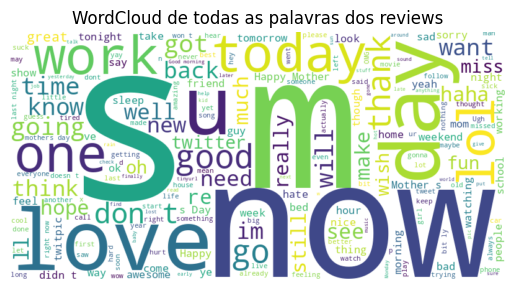

In [8]:
from wordcloud import WordCloud

texto_todos = ' '.join(dados['text_str'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_todos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de todas as palavras dos reviews')

7.a) Repita somente para os comentários negativos

Text(0.5, 1.0, 'WordCloud de todas as palavras dos reviews negativos')

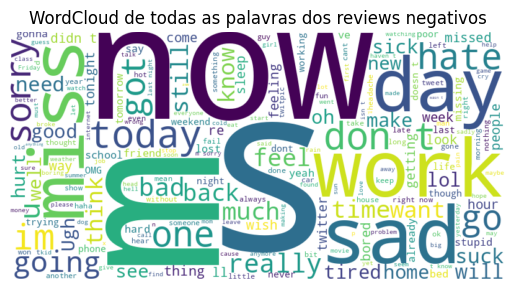

In [9]:
texto_todos = ' '.join(dados[dados['sentiment'] == 'negative']['text_str'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_todos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de todas as palavras dos reviews negativos')

7.b) Repita somente para os comentários neutros

Text(0.5, 1.0, 'WordCloud de todas as palavras dos reviews neutros')

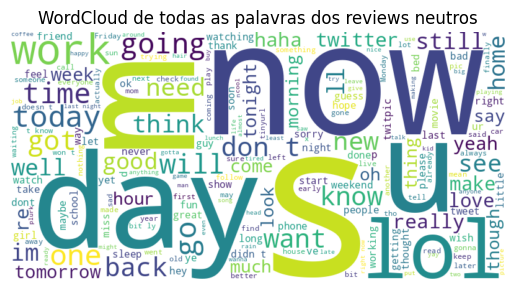

In [10]:
texto_todos = ' '.join(dados[dados['sentiment'] == 'neutral']['text_str'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_todos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de todas as palavras dos reviews neutros')

7.c) Repita somente para os comentários positivos

Text(0.5, 1.0, 'WordCloud de todas as palavras dos reviews positivos')

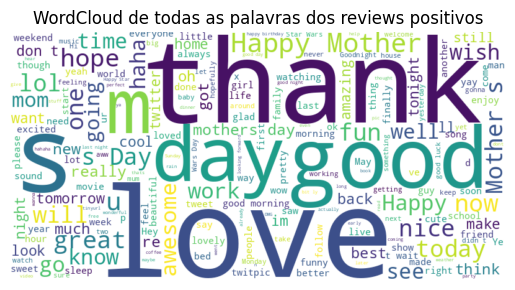

In [11]:
texto_todos = ' '.join(dados[dados['sentiment'] == 'positive']['text_str'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_todos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de todas as palavras dos reviews positivos')

8. Mostre a distribuição da variável alvo através de um gráfico de barras

Text(0, 0.5, 'Frequência')

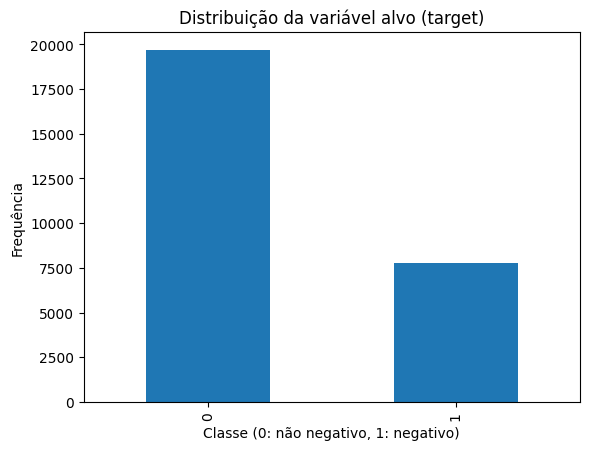

In [12]:

dados['target'].value_counts().plot(kind='bar')
plt.title('Distribuição da variável alvo (target)')
plt.xlabel('Classe (0: não negativo, 1: negativo)')
plt.ylabel('Frequência')

8.a) Repita mostrando a distribuição dos sentimentos originais (negativo, positivo e neutro)

Text(0, 0.5, 'Frequência')

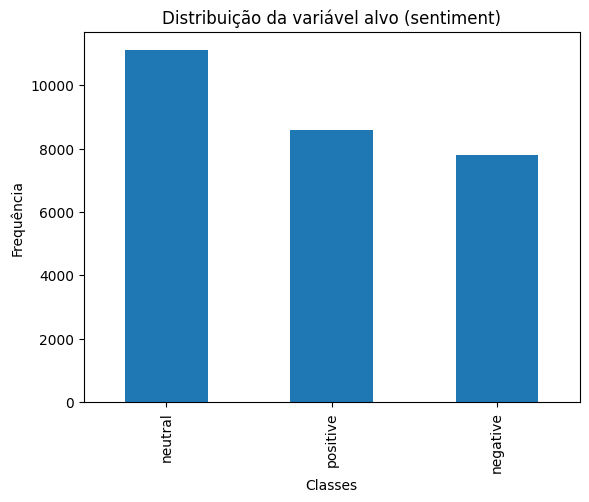

In [13]:
dados['sentiment'].value_counts().plot(kind='bar')
plt.title('Distribuição da variável alvo (sentiment)')
plt.xlabel('Classes')
plt.ylabel('Frequência')

## 2. Limpeza e separação dos dados

1. Remova as colunas extra do dataset, deixando somente as colunas text e target

In [14]:
dados = dados.drop(columns=['textID', 'selected_text', 'sentiment',
        'text_str', 'text_len', 'word_count'])

2. (Se necessário) Trate os dados faltantes ou duplicados

Como indicado acima, temos um dado faltante na coluna text e nenhum duplicado.

In [15]:
dados = dados.dropna().reset_index(drop=True)

3. Separe 20% do conjunto para teste utilizando a divisão estratificada com base na coluna target

In [16]:
from sklearn.model_selection import train_test_split


X_train_val, X_test, y_train_val, y_test = train_test_split(dados['text'], dados['target'], test_size=0.2)

4. Separar o conjunto de Validação


In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2)

## 3. Seleção de hiperparâmetros

### 3.1 Com uso de validação Hold-out

Transformando o texto em vetores

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

texto = dados['text'].astype(str)

vectorizer = CountVectorizer()
vectorizer.fit(texto)

texto_BoW = pd.DataFrame.sparse.from_spmatrix(
  vectorizer.transform(texto),
  columns=vectorizer.get_feature_names_out())
texto_BoW

,00,000,000th,00am,00pm,01,02,024,02mxjj,03,...,½tearï,½timo,½ureo,½ve,½why,½whyyy,½y,½you,½z,½ï
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**(Pipeline de pré-processamento)**
1. Nesta etapa, defina a pipeline de pré-processamento como sendo somente o CountVectorizer com seus parâmetros padrão

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

model = make_pipeline(CountVectorizer(), LogisticRegression())

**(Seleção de hiperparâmetros)**

2. Regressão Logística


a) Treine um modelo de regressão logística com os parâmetros padrão


In [21]:
from sklearn.metrics import accuracy_score

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

print('Acurácia no conjunto de treino:', accuracy_score(y_train, y_pred_train))
print('Acurácia no conjunto de validação:', accuracy_score(y_val, y_pred_val))



Acurácia no conjunto de treino: 0.9253425825894126
Acurácia no conjunto de validação: 0.8278371617011598


b) Realize a otimização de hiperparâmetros

In [32]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.1, 100.0], 'max_iter':[10, 1000]}

model = make_pipeline(CountVectorizer(),
                      GridSearchCV(LogisticRegression(), parameters))
model.fit([X_train, X_val], [y_train, y_val])



print('Melhor parâmetro:', model[1].best_params_)
print('Melhor acurácia:', model[1].best_score_)


AttributeError: 'Series' object has no attribute 'lower'

Otimização usando Optuna (extra)

In [29]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 8.1 MB/s eta 0:00:00


In [31]:
import optuna

def objective(trial):

    c = trial.suggest_float("c", 0.1, 10.0)
    max_iter = trial.suggest_int('max_iter', 10, 1000)

    parameters = {'C':[0.1, 100.0], 'max_iter':[10, 1000]}

    model = make_pipeline(CountVectorizer(), LogisticRegression(C=c, max_iter=max_iter))
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    return accuracy_score(y_val, y_pred)

study = optuna.create_study()
study.optimize(objective, n_trials=100)

study.best_params

[I 2025-09-20 23:41:34,218] A new study created in memory with name: no-name-2adaddda-706e-4243-9044-fbd1f8f44902
[I 2025-09-20 23:41:39,445] Trial 0 finished with value: 0.8194223334091426 and parameters: {'c': 8.42172805703991, 'max_iter': 242}. Best is trial 0 with value: 0.8194223334091426.
[I 2025-09-20 23:41:42,415] Trial 1 finished with value: 0.8196497612008188 and parameters: {'c': 8.85492014008991, 'max_iter': 288}. Best is trial 0 with value: 0.8194223334091426.
[I 2025-09-20 23:41:45,561] Trial 2 finished with value: 0.8203320445758472 and parameters: {'c': 7.303809196497351, 'max_iter': 148}. Best is trial 0 with value: 0.8194223334091426.
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer 

{'c': 0.10143633561197717, 'max_iter': 295}